In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import cv2 
from skimage.transform import resize
from sklearn import metrics

## Read in the HS images from disk

In [3]:
test_img_paths = [img_path for img_path in glob.glob("../../array_gds_datasets/gds_clips_array_benchmark?/image_clips/HST?_*.png")]

num_imgs = len(test_img_paths)
print(num_imgs)
#print(test_img_paths[1].shape)

'''
test_img=np.uint8(np.zeros((num_imgs,480,480)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(480,480), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
'''

2750


'\ntest_img=np.uint8(np.zeros((num_imgs,480,480)))\nfor i, imp in enumerate(test_img_paths):\n    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)\n    img_resized = cv2.resize(img,(480,480), interpolation = cv2.INTER_AREA)\n    test_img[i]=img_resized\n'

## Show the first 10 HS images 
## Try different downsampling sizes 480x480 (x10 reduce), 48x48 (x100), 120x120 (x40)

(2750, 480, 480)


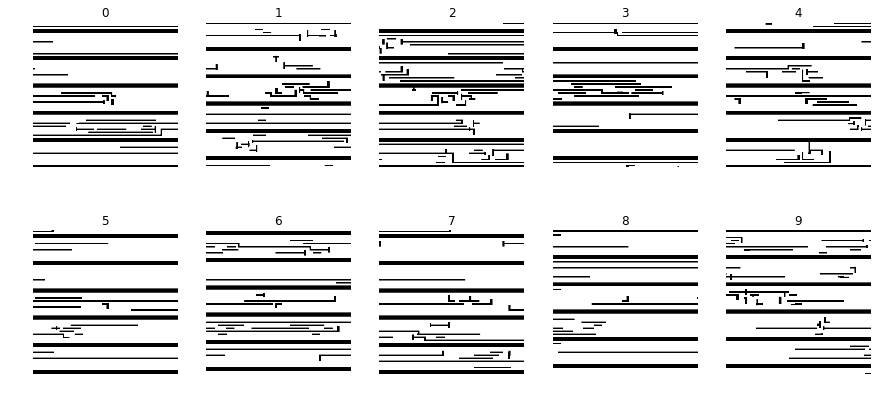

In [4]:
# 2750 x 4800 x 4800
test_img=np.uint8(np.zeros((num_imgs,480,480)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(480,480), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

(1303, 48, 48)


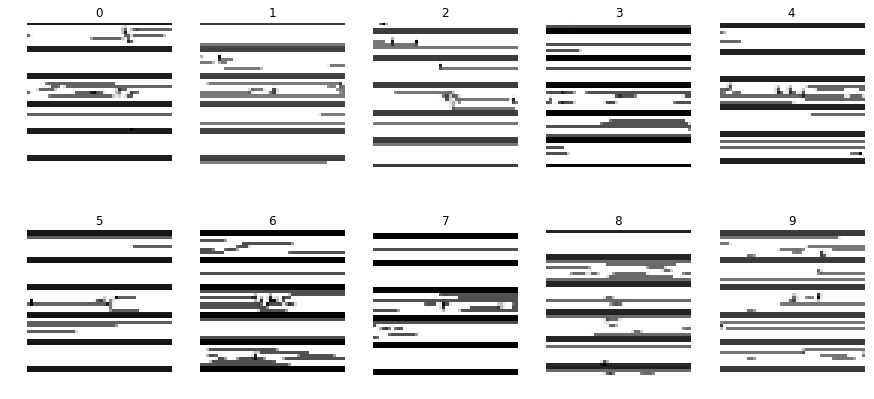

In [24]:
test_img=np.uint8(np.zeros((num_imgs,48,48)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(48,48), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

(2750, 120, 120)


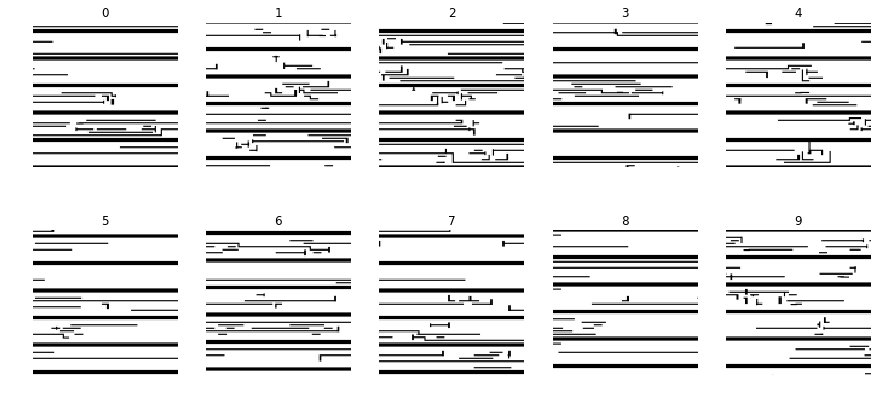

In [5]:
test_img=np.uint8(np.zeros((num_imgs,120,120)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(120,120), interpolation = cv2.INTER_AREA)
    test_img[i]=img_resized
    

print(test_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Crop the center core region (1.2umx 1.2um)

(2750, 120, 120)
(2750, 30, 30)


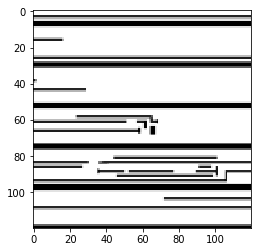

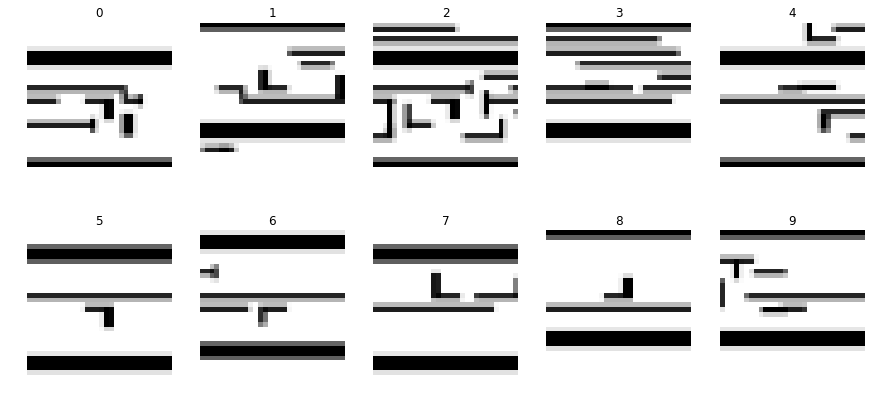

In [6]:
print(test_img.shape)
plt.imshow(test_img[0], cmap='Greys')
crop_img_list = np.uint8(np.zeros((num_imgs,30,30)))
crop_img_list = test_img[:, 45:75, 45:75]

#for i, imp in enumerate(test_img):
#    #NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
#    crop_img = img[45:75, 45:75]
#    crop_img_list[i]=crop_img

plt.figure(figsize=(15, 7))
print(crop_img_list.shape)


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(crop_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Plot the image histogram

255
0


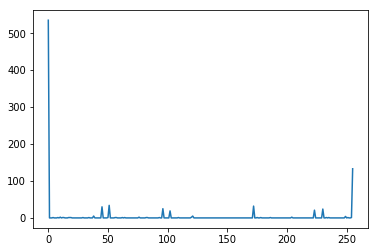

In [7]:
# Plot the image histogram to confirm that there are pixels with 0(black) and 255(white) values
print(crop_img_list[0].max())
print(crop_img_list[0].min())
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([crop_img_list[0]],[0],None,[256],[0,256])
plt.plot(hist)
#plt.hist(crop_img_list[0].ravel(),256,[0,256])
plt.show()

## Random sample 10 images from the HS list

[897, 1478, 2398, 1157, 2723, 272, 499, 2160, 1148, 2170]
0 897
1 1478
2 2398
3 1157
4 2723
5 272
6 499
7 2160
8 1148
9 2170


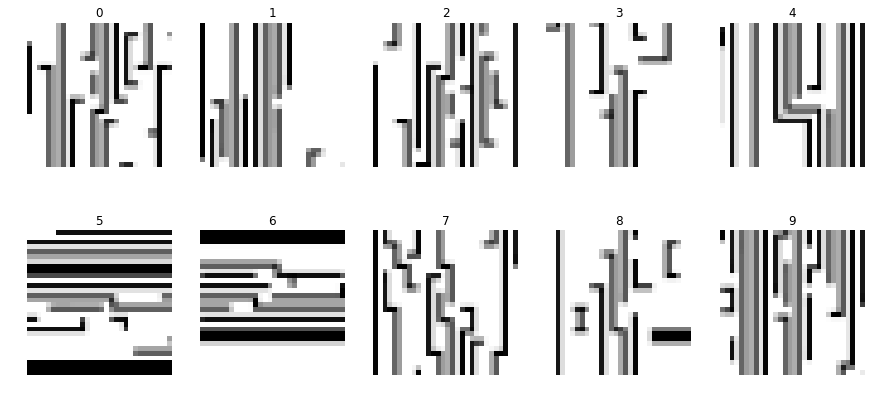

In [8]:
from sklearn.model_selection import train_test_split
import random

random_img_index = random.sample(range(num_imgs), 10)
print(random_img_index)

random_img_list = np.uint8(np.zeros((num_imgs,30,30)))
for i, random_idx in enumerate(random_img_index):
    print(i, random_idx)
    random_img_list[i] = crop_img_list[random_idx]


plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

## Read in all NH images and downsampled to 120x120

13503
(13503, 120, 120)


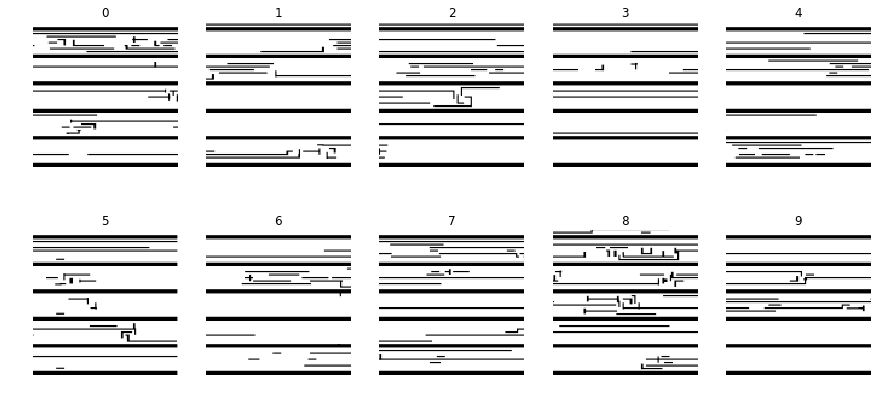

In [11]:
# Read in the downsample all the 13503 NH images takes about 22 mins
nh_img_paths = [nh_img_path for nh_img_path in glob.glob("../../array_gds_datasets/gds_clips_array_benchmark?/image_clips/NH_*.png")]
nh_num_imgs = len(nh_img_paths)
print(nh_num_imgs)
#print(test_img_paths[1].shape)


nh_img=np.uint8(np.zeros((nh_num_imgs,120,120)))
for i, imp in enumerate(nh_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img,(120, 120), interpolation = cv2.INTER_AREA)
    nh_img[i]=img_resized
    
print(nh_img.shape)

plt.figure(figsize=(15, 7))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_img[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

In [12]:
# NH: 13503x120x120    HS: 2750x120x120
# number of images x dimensions 
import pickle
pickle.dump(nh_img, open( "./pickled_data/array_all_nh_imgs_13503_120x120.p", "wb" ) )
pickle.dump(test_img, open( "./pickled_data/array_all_hs_imgs_2750_120x120.p", "wb" ) )

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import cv2 
from skimage.transform import resize
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

In [14]:
nh_img = './pickled_data/array_all_nh_imgs_13503_120x120.p'
hs_img = './pickled_data/array_all_hs_imgs_2750_120x120.p'



with open(nh_img, mode='rb') as f:
    nh_img_pickled = pickle.load(f)
with open(hs_img, mode='rb') as f:
    hs_img_pickled = pickle.load(f)


13503
(13503, 120, 120)
<class 'numpy.ndarray'>
(13503, 30, 30)


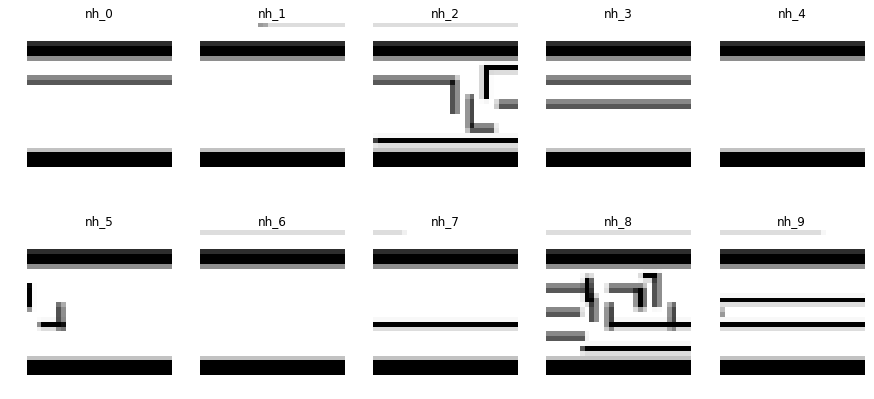

2750
(2750, 120, 120)
<class 'numpy.ndarray'>
(2750, 30, 30)


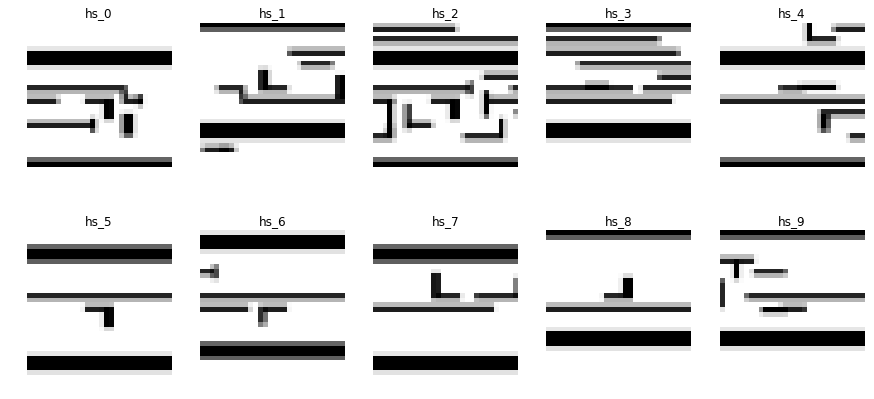

In [15]:
nh_num_imgs = len(nh_img_pickled)
print(nh_num_imgs)
print(nh_img_pickled.shape)
print(type(nh_img_pickled))

#plt.imshow(nh_img_pickled[0], cmap='Greys')
nh_crop_img_list = np.uint8(np.zeros((nh_num_imgs,30,30)))
nh_crop_img_list = nh_img_pickled[:, 45:75, 45:75]

plt.figure(figsize=(15, 7))
print(nh_crop_img_list.shape)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_crop_img_list[i], cmap='Greys') 
    plt.title("nh_"+str(i))
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()


hs_num_imgs = len(hs_img_pickled)
print(hs_num_imgs)
print(hs_img_pickled.shape)
print(type(hs_img_pickled))

#plt.imshow(nh_img_pickled[0], cmap='Greys')
hs_crop_img_list = np.uint8(np.zeros((hs_num_imgs,30,30)))
hs_crop_img_list = hs_img_pickled[:, 45:75, 45:75]

plt.figure(figsize=(15, 7))
print(hs_crop_img_list.shape)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(hs_crop_img_list[i], cmap='Greys') 
    plt.title("hs_"+str(i))
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()

255
0


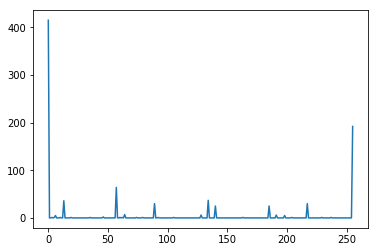

In [16]:
print(nh_crop_img_list[0].max())
print(nh_crop_img_list[0].min())
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([nh_crop_img_list[2]],[0],None,[256],[0,256])
plt.plot(hist)
#plt.hist(crop_img_list[0].ravel(),256,[0,256])
plt.show()

[4156, 7699, 7091, 4165, 3674, 9926, 1260, 625, 11546, 6372]
0 4156
1 7699
2 7091
3 4165
4 3674
5 9926
6 1260
7 625
8 11546
9 6372


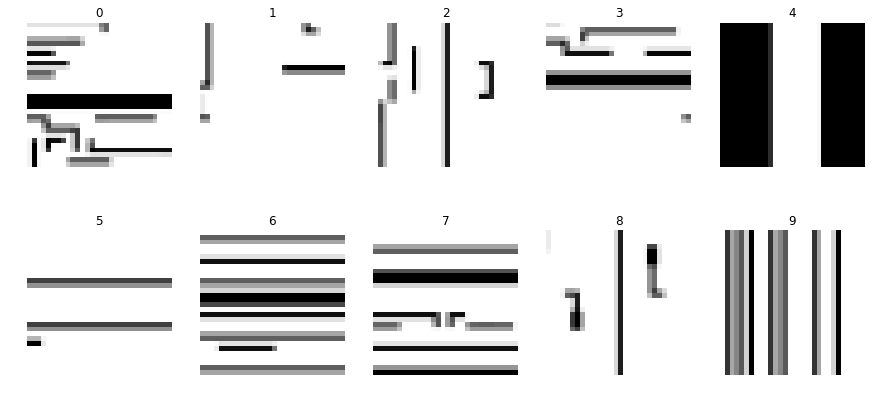

In [17]:
nh_random_img_index = random.sample(range(nh_num_imgs), 10)
print(nh_random_img_index)

nh_random_img_list = np.uint8(np.zeros((nh_num_imgs,30,30)))
for i, random_idx in enumerate(nh_random_img_index):
    print(i, random_idx)
    nh_random_img_list[i] = nh_crop_img_list[random_idx]


plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(nh_random_img_list[i], cmap='Greys') 
    plt.title(i)
    plt.axis('off')
    #num_of_samples.append(len(x_selected))
plt.show()


In [18]:
# BenchMark   HST1   HST2    NH
# 1           60     39      340
# 2           173    1       5285
# 3           892    17      4643
# 4           90     5       4452
# 5           25     1       2716
# Total       1240   63      17436

hs_label_list1 = np.ones((226,), dtype=np.int)
hs_label_list2 = np.ones((498,), dtype=np.int)
hs_label_list3 = np.ones((1808,), dtype=np.int)
hs_label_list4 = np.ones((177,), dtype=np.int)
hs_label_list5 = np.ones((41,), dtype=np.int)
hs_label_list_all = np.concatenate((hs_label_list1, hs_label_list2, hs_label_list3, hs_label_list4, hs_label_list5), axis=0)
print(hs_label_list_all.shape)

nh_label_list1 = np.zeros((319,), dtype=np.int)
nh_label_list2 = np.zeros((4146,), dtype=np.int)
nh_label_list3 = np.zeros((3541,), dtype=np.int)
nh_label_list4 = np.zeros((3386,), dtype=np.int)
nh_label_list5 = np.zeros((2111,), dtype=np.int)
nh_label_list_all = np.concatenate((nh_label_list1, nh_label_list2, nh_label_list3, nh_label_list4, nh_label_list5), axis=0)
print(nh_label_list_all.shape)

all_labels = np.concatenate((hs_label_list_all, nh_label_list_all), axis=0)
print(all_labels.shape)
print(all_labels[0:10])
print(all_labels[2750:2760])

(2750,)
(13503,)
(16253,)
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0]


In [19]:
nh_random_img_index_select = random.sample(range(nh_num_imgs), 2750)
print(np.array(nh_random_img_index_select).shape)
print(nh_random_img_index_select[0:10])

nh_label_random_selected = np.array([nh_label_list_all[i] for i in nh_random_img_index_select])

nh_img_random_selected = np.array([nh_crop_img_list[i] for i in nh_random_img_index_select])

print(nh_label_random_selected.shape)
print(nh_img_random_selected.shape)

(2750,)
[4188, 13220, 367, 2188, 9418, 5389, 11564, 4101, 1412, 13054]
(2750,)
(2750, 30, 30)


In [20]:
selected_labels = np.concatenate((hs_label_list_all, nh_label_random_selected), axis=0)
print(selected_labels.shape)
print(selected_labels[0:10])
print(selected_labels[2750:2760])

(5500,)
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0]


In [21]:
nh_img_random_selected

nh_img_with_label = {'images': nh_img_random_selected,
             'labels': nh_label_random_selected}
hs_img_with_label = {'images': hs_crop_img_list,
             'labels': hs_label_list_all}

pickle.dump(nh_img_with_label, open( "./pickled_data/array_2750_nh_imgs_and_labels_30x30.p", "wb" ) )
pickle.dump(hs_img_with_label, open( "./pickled_data/array_2750_hs_imgs_and_labels_30x30.p", "wb" ) )


# Restart from this point 

In [22]:
nh_img_load = './pickled_data/array_2750_nh_imgs_and_labels_30x30.p'
hs_img_load = './pickled_data/array_2750_hs_imgs_and_labels_30x30.p'

with open(nh_img_load, mode='rb') as f:
    nh_img_30x30 = pickle.load(f)
with open(hs_img_load, mode='rb') as f:
    hs_img_30x30 = pickle.load(f)

In [23]:
print(nh_img_30x30['images'].shape)
print(hs_img_30x30['images'].shape)
print(nh_img_30x30['labels'].shape)
print(hs_img_30x30['labels'].shape)

nh_imgs = nh_img_30x30['images'].reshape(2750, 30, 30, 1)
nh_labels = nh_img_30x30['labels']
hs_imgs = hs_img_30x30['images'].reshape(2750, 30, 30, 1)
hs_labels = hs_img_30x30['labels']

all_images = np.concatenate((nh_imgs, hs_imgs), axis=0)
all_labels = np.concatenate((nh_labels, hs_labels), axis=0)
print(all_images.shape)
print(all_labels.shape)

(2750, 30, 30)
(2750, 30, 30)
(2750,)
(2750,)
(5500, 30, 30, 1)
(5500,)


In [24]:
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, all_labels, test_size=0.1, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=1)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4455, 30, 30, 1) (4455,)
(495, 30, 30, 1) (495,)
(550, 30, 30, 1) (550,)


In [25]:


X_train, y_train = shuffle(X_train, y_train)

In [26]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 32


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 30x30x1. Output = 26x26x6.
    # (Input_size - filter_size + 1)/stride = (30-5+1)/1 = 26
    conv_layer1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv_layer1_b = tf.Variable(tf.zeros(6))
    conv_layer1_out = tf.nn.conv2d(x, conv_layer1_w, strides=[1,1,1,1], padding='VALID')+conv_layer1_b

    # TODO: Activation.
    conv_layer1_act_out = tf.nn.relu(conv_layer1_out)

    # TODO: Pooling. Input = 26x26x6. Output = 14x14x6.
    # (input_height - filter_height)/S + 1 = (26-2)/2 +1 = 13
    conv_layer1_pool_out = tf.nn.max_pool(conv_layer1_act_out, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Layer 2: Convolutional. Input=13x13x6 Output = 10x10x16.
    # (13-4+1)/ = 10
    conv_layer2_w = tf.Variable(tf.truncated_normal(shape=(4,4,6,16), mean=mu, stddev=sigma))
    conv_layer2_b = tf.Variable(tf.zeros(16))
    conv_layer2_out = tf.nn.conv2d(conv_layer1_pool_out, conv_layer2_w, strides=[1,1,1,1], padding='VALID')+conv_layer2_b
    
    # TODO: Activation.
    conv_layer2_act_out = tf.nn.relu(conv_layer2_out)
    #conv_layer2_drop_out = tf.nn.dropout(conv_layer2_act_out, keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2_pool_out = tf.nn.max_pool(conv_layer2_act_out, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv_flat_out = flatten(conv_layer2_pool_out)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 100.
    fc_layer3_w = tf.Variable(tf.truncated_normal(shape=(400, 40), mean=mu, stddev=sigma))
    fc_layer3_b = tf.Variable(tf.zeros(40))
    fc_layer3_out = tf.matmul(conv_flat_out, fc_layer3_w) + fc_layer3_b
    fc_layer3_drop_out = tf.nn.dropout(fc_layer3_out, keep_prob)
    
    # TODO: Activation.
    fc_layer3_act_out = tf.nn.relu(fc_layer3_drop_out)

    # TODO: Layer 4: Fully Connected. Input = 40. Output = 8.
    fc_layer4_w = tf.Variable(tf.truncated_normal(shape=(40, 8), mean=mu, stddev=sigma))
    fc_layer4_b = tf.Variable(tf.zeros(8))
    fc_layer4_out = tf.matmul(fc_layer3_act_out, fc_layer4_w) + fc_layer4_b
    fc_layer4_drop_out = tf.nn.dropout(fc_layer4_out, keep_prob)
    
    # TODO: Activation.
    fc_layer4_act_out = tf.nn.relu(fc_layer4_drop_out)

    # TODO: Layer 5: Fully Connected. Input = 8. Output = 2.
    fc_layer5_w = tf.Variable(tf.truncated_normal(shape=(8, 2), mean=mu, stddev=sigma))
    fc_layer5_b = tf.Variable(tf.zeros(2))
    logits = tf.matmul(fc_layer4_act_out, fc_layer5_w) + fc_layer5_b
    
    return logits

In [27]:
x = tf.placeholder(tf.float32, (None, 30, 30, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 2)

In [28]:
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

predicted = tf.cast(tf.argmax(logits, 1), tf.float32)
actual = tf.cast(tf.argmax(one_hot_y, 1), tf.float32)
#predicted = tf.argmax(logits, 1)
#actual = tf.argmax(one_hot_y, 1)
TP = tf.cast(tf.count_nonzero(predicted * actual), tf.float32)
TN = tf.cast(tf.count_nonzero((predicted - 1) * (actual - 1)), tf.float32)
FP = tf.cast(tf.count_nonzero(predicted * (actual - 1)), tf.float32)
FN = tf.cast(tf.count_nonzero((predicted - 1) * actual), tf.float32)


saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_TP = 0
    total_TN = 0
    total_FP = 0
    total_FN = 0
    #predicted=0
    #actual=0
    predicted_list=[]
    actual_list=[]
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        result = sess.run([accuracy_operation, TP, TN, FP, FN, predicted, actual], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (result[0] * len(batch_x))       
        total_TP += (result[1])
        total_TN += (result[2])
        total_FP += (result[3])
        total_FN += (result[4])
        
        #print(result[5])
        #print(result[6])        
        predicted_list.append(result[5])
        actual_list.append(result[6])
        
      
    final_accuracy = total_accuracy / num_examples
    
    precision = total_TP / (total_TP + total_FP)
    recall = total_TP / (total_TP+total_FN)
    FPR = total_FP / (total_TN+total_FP)
    f1 = 2.0 * precision * recall / (precision+recall)

    return_metrics = [final_accuracy, precision, recall, f1, FPR, predicted_list, actual_list, total_TP, total_TN, total_FP, total_FN]

    return return_metrics

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_figure = []
    validation_precision_figure = []
    validation_recall_figure = []
    validation_f1_figure = []
    validation_predicted_list=[]
    validation_actual_list=[]
    training_accuracy_figure = []
    training_precision_figure = []
    training_recall_figure = []
    training_f1_figure = []

    #training_metrics = [0, 0, 0, 0]
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print(batch_x.shape)
            #print(x.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            
        training_metrics = evaluate(X_train, y_train)
        #print(type(training_metrics))
        #print(len(training_metrics))
        #print(training_metrics)
        training_accuracy = training_metrics[0]
        training_precision = training_metrics[1]
        training_recall = training_metrics[2]
        training_f1 = training_metrics[3]
                   
        training_accuracy_figure.append(training_accuracy)
        training_precision_figure.append(training_precision)
        training_recall_figure.append(training_recall)
        training_f1_figure.append(training_f1)
        
        
        validation_metrics = evaluate(X_valid, y_valid)
        validation_accuracy = validation_metrics[0]
        validation_precision = validation_metrics[1]
        validation_recall = validation_metrics[2]
        validation_f1 = validation_metrics[3]
        validation_predicted = validation_metrics[5]
        validation_actual = validation_metrics[6]
                
        validation_accuracy_figure.append(validation_accuracy)
        validation_precision_figure.append(validation_precision)
        validation_recall_figure.append(validation_recall)
        validation_f1_figure.append(validation_f1)
        validation_predicted_list.append(validation_predicted)
        validation_actual_list.append(validation_actual)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.4f}".format(training_accuracy))
        print("Training precision = {:.4f}".format(training_precision))
        print("Training recall = {:.4f}".format(training_recall))
        print("Training f1 = {:.4f}".format(training_f1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print("Validation precision = {:.4f}".format(validation_precision))
        print("Validation recall = {:.4f}".format(validation_recall))
        print("Validation f1 = {:.4f}".format(validation_f1))
        #print("Validation predicted_list", validation_predicted_list)
        print()
        
    saver.save(sess, './array_lenet2')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.9210
Training precision = 0.9800
Training recall = 0.8593
Training f1 = 0.9157
Validation Accuracy = 0.9030
Validation precision = 0.9862
Validation recall = 0.8263
Validation f1 = 0.8992

EPOCH 2 ...
Training Accuracy = 0.9522
Training precision = 0.9195
Training recall = 0.9910
Training f1 = 0.9539
Validation Accuracy = 0.9434
Validation precision = 0.9200
Validation recall = 0.9768
Validation f1 = 0.9476

EPOCH 3 ...
Training Accuracy = 0.9834
Training precision = 0.9918
Training recall = 0.9748
Training f1 = 0.9832
Validation Accuracy = 0.9636
Validation precision = 0.9879
Validation recall = 0.9421
Validation f1 = 0.9644

EPOCH 4 ...
Training Accuracy = 0.9892
Training precision = 0.9932
Training recall = 0.9852
Training f1 = 0.9892
Validation Accuracy = 0.9616
Validation precision = 0.9800
Validation recall = 0.9459
Validation f1 = 0.9627

EPOCH 5 ...
Training Accuracy = 0.9908
Training precision = 0.9941
Training recall = 0.9874
Tra

INFO:tensorflow:Restoring parameters from ./array_lenet2
pre 0.996212121212
recall 0.988721804511
f1 0.992452830189
FPR 0.00352112676056


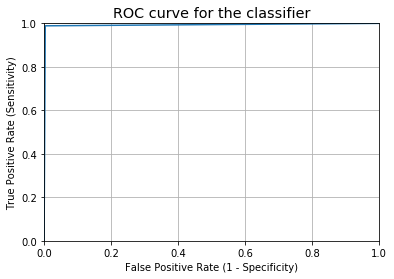

AUC = 0.9926
Testing Accuracy = 0.9927
Testing TP = 263.0000
Testing TN = 283.0000
Testing FP = 1.0000
Testing FN = 3.0000


In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./array_lenet2.meta')
    saver2.restore(sess, "./array_lenet2")
    #test_accuracy = evaluate(X_test, y_test)
    
    test_predicted_list = []
    test_actual_list = []
    
    test_metrics = evaluate(X_test, y_test)
    #test_metrics = evaluate(X_valid, y_valid)
    test_accuracy = test_metrics[0]
    

    test_precision = test_metrics[1]
    test_recall = test_metrics[2]
    test_f1 = test_metrics[3]
    test_FPR = test_metrics[4]
    test_predicted = test_metrics[5]
    test_actual = test_metrics[6]
    test_TP = test_metrics[7]
    test_TN = test_metrics[8]
    test_FP = test_metrics[9]
    test_FN = test_metrics[10]
    
    print("pre", test_precision) 
    print("recall", test_recall)
    print("f1", test_f1)
    print("FPR", test_FPR)
    test_predicted_list.append(test_predicted)
    test_actual_list.append(test_actual)
    #print(test_predicted_list)
    #print(test_actual_list)
    #print(len(test_predicted_list))
    #print(len(test_actual_list))
    test_predicted_list_flat = np.concatenate(test_predicted_list).ravel()
    test_actual_list_flat = np.concatenate(test_actual_list).ravel()
    test_predicted_list_flat_2 = np.concatenate(test_predicted_list_flat).ravel()
    test_actual_list_flat_2 = np.concatenate(test_actual_list_flat).ravel()
    #print(test_predicted_list_flat_2)
    #print(test_actual_list_flat_2)
    
    fpr, tpr, thresholds = metrics.roc_curve(test_actual_list_flat_2, test_predicted_list_flat_2)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for the classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    AUC = metrics.roc_auc_score(test_actual_list_flat_2, test_predicted_list_flat_2)
    
    print("AUC = {:.4f}".format(AUC))
    print("Testing Accuracy = {:.4f}".format(test_accuracy))
    print("Testing TP = {:.4f}".format(test_TP))
    print("Testing TN = {:.4f}".format(test_TN))
    print("Testing FP = {:.4f}".format(test_FP))
    print("Testing FN = {:.4f}".format(test_FN))

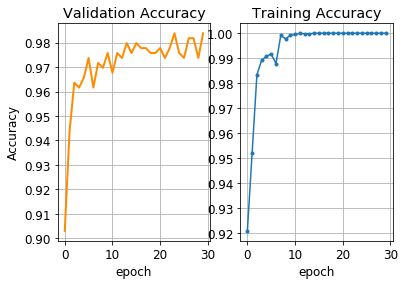

In [33]:
lw =2 

plt.subplot(1, 2, 1)
plt.plot(validation_accuracy_figure, color='darkorange', lw=lw)
plt.xlabel('epoch')
plt.title("Validation Accuracy")
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(training_accuracy_figure, '.-')
plt.xlabel('epoch')
plt.title("Training Accuracy")
#plt.ylabel('Training Accuracy')

plt.grid(True)
plt.show()

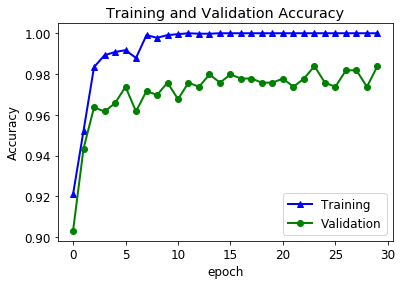

In [34]:
lw =2 

plt.plot(training_accuracy_figure, 'b^-', lw=lw)
plt.plot(validation_accuracy_figure, 'go-', lw=lw)

plt.xlabel('epoch')
plt.title("Training and Validation Accuracy")
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()